In [45]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers

import skimage as ski
from skimage.transform import resize
from sklearn.model_selection import train_test_split

Convert images from pixals into data that we can work with for Ml

In [10]:
data_dir = 'C:/Users/Nick/Documents/SchoolStuff/spring2024/machineLearning/final_project/tradingpatterns/images'
categories = ['chan_down', 'chan_up', 'doub_bot', 'doub_top', 'hs', 'tri', 'wed_down', 'wed_up']

In [65]:
# Pixal size is something to take into account for training a model
# Starting with small resolution to be more efficient
# STARTING SIZE IS 480 x 345
data = []
labels = []
for category_idx, category in enumerate(categories):
    count = 0
    for file in os.listdir(data_dir + '/' + category):
        image = ski.io.imread(data_dir + '/' + category + '/' + file)
        image = resize(image, (32, 32))
        data.append(image)
        labels.append(category_idx)
        count += 1
        if count > 500:
            break

In [73]:
data[0].shape

(32, 32, 4)

In [74]:
data1 = np.asarray(data)
labels1 = np.asarray(labels)

In [77]:
data1[0].shape

(32, 32, 4)

In [78]:
# Split data into train and test sets using 42 to make reproducable results
xtrain, xtest, ytrain, ytest = train_test_split(data1, labels1, test_size=0.2, random_state=42, shuffle=True, stratify=labels1)

In [79]:
# print data dimensions, note the 3 that indicates three channels (red, green, blue)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((3206, 32, 32, 4), (802, 32, 32, 4), (3206,), (802,))

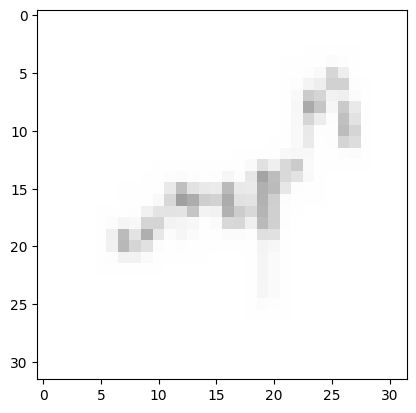

In [91]:
for _ in range(1):
    plt.imshow(xtrain[np.random.randint(len(xtrain))])
    plt.show()

In [92]:
xtrain = xtrain/255
xtest = xtest/255

xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2)